## Importing Packages

In [3]:
import pandas as pd
import numpy as np
import string
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from PIL import Image

import re
import os
os.getcwd()

'/Users/rahulshelke/Documents/Data Science/Data Science Projects/bbc-news-sorting/notebooks'

In [4]:
# importing the zipfile module 
from zipfile import ZipFile 
import os
# loading the temp.zip and creating a zip object 
with ZipFile(os.path.join(os.getcwd() ,"data/learn-ai-bbc.zip"), 'r') as zObject: 
	# Extracting all the members of the zip 
	# into a specific location. 
	zObject.extractall(path=os.path.join(os.getcwd(), "data")) 


## Load the Dataset

In [5]:
DATA_PATH = os.path.join(os.getcwd(), "data")
# print(DATA_PATH)

In [6]:
test_df = pd.read_csv(os.path.join(DATA_PATH, "BBC News Test.csv"))
test_df.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [7]:
train_df = pd.read_csv(os.path.join(DATA_PATH, "BBC News Train.csv"))
train_df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [8]:
train_df.shape

(1490, 3)

In [9]:
train_df["Category"].value_counts()

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

## Check with Each Category of Data

### 1. business

In [10]:
b_data = train_df[train_df["Category"] == "business"].copy()

b_data.shape

(336, 3)

In [11]:
b_data

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
4,917,enron bosses in $168m payout eighteen former e...,business
8,2034,car giant hit by mercedes slump a slump in pro...,business
...,...,...,...
1474,1257,indy buys into india paper irish publishing gr...,business
1479,2058,high fuel costs hit us airlines two of the lar...,business
1480,1124,qantas sees profits fly to record australian a...,business
1484,1774,hyundai to build new india plant south korea s...,business


In [12]:
print("First 10 samples of businees relates news samples\n".format(), b_data[:10])

First 10 samples of businees relates news samples
     ArticleId                                               Text  Category
0        1833  worldcom ex-boss launches defence lawyers defe...  business
1         154  german business confidence slides german busin...  business
2        1101  bbc poll indicates economic gloom citizens in ...  business
4         917  enron bosses in $168m payout eighteen former e...  business
8        2034  car giant hit by mercedes slump a slump in pro...  business
12       1028  uk coal plunges into deeper loss shares in uk ...  business
13        812  bp surges ahead on high oil price oil giant bp...  business
25       1561  china had role in yukos split-up china lent ru...  business
29       1503  iran budget seeks state sell-offs iran s presi...  business
32       2002  china continues rapid growth china s economy h...  business


**Data Containes:**

- Currancies
- Years
- Numbers
- Percentage

In [13]:
def remove_curruncies(text):
    """
    removes different curruancies from text
    e.g., $1,000, ₹500, €10.99

    Args: text (str)

    Returns: text (str)
    """
    try:
        # Currency regex pattern (includes symbols and codes)
        currency_pattern = r'[\₹\$\€\¥\£\₣\₽]?\d{1,3}(?:,\d{3})*(?:\.\d+)?(?:[mbn]{1,2})?|\b(?:USD|EUR|INR|GBP|JPY|CAD|AUD|CNY)\b|[\₹\$\€\¥\£\₣\₽]'


        currency_free_text = re.sub(currency_pattern, '', text)

        return currency_free_text
    except Exception as e:
        raise e

In [14]:
def remove_percentage(text):
    """ 
    removes percentages
    ex.,  25%, 5.5%, 1,000%
    """
    try:
        # Regex pattern to remove percentages
        percentage_pattern = r'\d{1,3}(?:,\d{3})*(?:\.\d+)?%'

        # Remove all percentage values
        cleaned_text = re.sub(percentage_pattern, '', text)

        return cleaned_text
    except Exception as e:
        raise e

In [15]:
def remove_numbers(text):
    """ 
    removes numbers from text
    ex., 
    - Integers (e.g., 100, 20)
    - Decimals (e.g., 5.5, 1000.99)
    - Numbers with commas (e.g., 1,000, 1,000,000)
    """
    try:
        # Regex pattern to remove numbers
        number_pattern = r'\b\d+(?:,\d{3})*(?:\.\d+)?\b'

        # Remove all numbers
        cleaned_text = re.sub(number_pattern, '', text)

        return cleaned_text
    except Exception as e:
        raise e

In [16]:
def remove_punctuation(text):
    """
    Removes all punctuation from the text.
    
    Args:
    text (str): Input string containing text with punctuation.
    
    Returns:
    str: Text with punctuation removed.
    """
    try:
        # Regex pattern to match any punctuation character
        punctuation_pattern = r'[' + re.escape(string.punctuation) + r']'
        
        # Replace all punctuation marks with an empty string
        cleaned_text = re.sub(punctuation_pattern, '', text)
        
        return cleaned_text
    except Exception as e:
        raise e

In [17]:
def remove_special_characters(text):
    """
    Removes special characters (non-alphanumeric characters) from the text.
    
    Args:
    text (str): Input string containing special characters.
    
    Returns:
    str: Text with special characters removed.
    """
    try:
        # Regex pattern to match any character that is not a letter or a digit
        special_characters_pattern = r'[^a-zA-Z0-9\s]'  # Allow only letters, digits, and spaces
        
        # Replace all special characters with an empty string
        cleaned_text = re.sub(special_characters_pattern, ' ', text)
        
        return cleaned_text
    except Exception as e:
        raise e

In [18]:
def remove_multiple_spaces(text):
    """
    removes multiple spaces
    """
    try:
        cleaned_text = re.sub(r'\s+', ' ', text)
        return cleaned_text
    except Exception as e:
        raise e

In [25]:

# Get the list of English stop words from nltk
stop_words = set(stopwords.words('english'))
    
# Define a function to process each text entry
def remove_stopwords(text):
    # Convert text to lowercase and split into words
    words = text.lower().split()
    
    # Remove stop words and punctuation
    words = [word.strip(string.punctuation) for word in words if word not in stop_words]
    
    # Return the cleaned text
    return ' '.join(words)

In [26]:
#Lemmatize the dataset`
def lemma_corpus(data, pos):
    lemmatizer=WordNetLemmatizer()
    out_data=""
    for words in data:
        out_data+= lemmatizer.lemmatize(words, pos)
    return out_data

In [23]:
b_data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
4,917,enron bosses in $168m payout eighteen former e...,business
8,2034,car giant hit by mercedes slump a slump in pro...,business


In [27]:
# normalizing
b_data["clean"] = b_data["Text"].map(lambda x : x.lower())

# remove curruncies
b_data["clean"] = b_data["clean"].map(lambda x : remove_curruncies(x))

# remove percentage
b_data["clean"] = b_data["clean"].map(lambda x : remove_percentage(x))

# remove numbers
b_data["clean"] = b_data["clean"].map(lambda x : remove_numbers(x))

# remove special characters
b_data["clean"] = b_data["clean"].map(lambda x : remove_special_characters(x))

# remove punctuations
b_data["clean"] = b_data["clean"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
b_data["clean"] = b_data["clean"].map(lambda x : remove_multiple_spaces(x))

# remove stopwords 
b_data["clean"] = b_data["clean"].map(lambda x : remove_stopwords(x))

# lemmetization
b_data["clean"] = b_data["clean"].map(lambda x : lemma_corpus(x, 'v'))

In [28]:
b_data

,ArticleId,Text,Category,clean
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex boss launches defence lawyers defe...
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens maj...
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses payout eighteen former enron dire...
8,2034,car giant hit by mercedes slump a slump in pro...,business,car giant hit mercedes slump slump profitabili...
...,...,...,...,...
1474,1257,indy buys into india paper irish publishing gr...,business,indy buys india paper irish publishing group i...
1479,2058,high fuel costs hit us airlines two of the lar...,business,high fuel costs hit us airlines two largest ai...
1480,1124,qantas sees profits fly to record australian a...,business,qantas sees profits fly record australian airl...
1484,1774,hyundai to build new india plant south korea s...,business,hyundai build new india plant south korea hyun...


In [30]:
import random

for i in range(10):
    num = random.randint(0, b_data.shape[0])
    length = len(b_data.iloc[num][1])
    print(f"Text {num}: {b_data.iloc[num][1]}")
    print()
    print(f"Clean: {b_data.iloc[num][3]}")
    print('='*length)

Text 132: japan turns to beer alternatives japanese brewers are increasingly making money from beer-flavoured drinks rather than beer itself  beer and spirits are heavily taxed in japan  driving breweries to search for alternatives. japan s long economic downturn helped drive the trend  as drinkers looked for cheaper opportunities to drown their sorrows. now  according to asahi breweries  the market for so-called  beer-like  drinks is set to grow 84% this year.  asahi is predicting profits to rise 50% in 2005 as it launches a drink based on soybean peptides rather than malt. the chosen name   shinnama  or  new draft   disguises its non-beer nature. but despite a record profit in 2004 of 30.6bn yen ($291m; £154m)  up 31.8% on the previous year  asahi is coming late to the market. key rival sapporo is already well-established with the beer-flavoured  draft one . suntory  meanwhile  is doing well with  super blue   which combines happoshu - an existing low-cost beer alternative made with 

In [31]:
#WordCloud Visualizations
#Method for creating wordclouds

def display_cloud(data):
    """
    Generates and displays a word cloud based on input text data with a specified image mask and contour color.

    This function uses the WordCloud library to generate a visual representation of word frequencies in the 
    input text data. The word cloud is displayed using matplotlib, and it can be customized with an image 
    mask (if provided), background color, contour width, and contour color.

    Parameters:
    -----------
    data : pd.Series
        The input text data to be used for generating the word cloud. It can be a list of words or a single 
        string of text. The words in the input will be tokenized and used to determine the size of each word 
        in the cloud based on frequency.
    
    img_path : str
        The file path to an image that can be used as a mask for the word cloud shape. This image will dictate 
        the form of the word cloud. If not needed, this parameter can be left commented out or set to None 
        (currently not used in this version).

    color : str
        The color to be used for the contour of the word cloud. The contour color will be applied around 
        the edges of the cloud. Typical values could be any valid Matplotlib color (e.g., 'blue', 'red', 
        'green', etc.).

    Returns:
    --------
    None
        The function does not return anything. It generates a word cloud and displays it using matplotlib.
    """
    plt.subplots(figsize=(10,10))
    # mask = np.array(Image.open(img_path))
    wc = WordCloud(stopwords=stopwords.words(), 
                   background_color="black", 
                   max_words=100, max_font_size=256,
                   random_state=42
                   )
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

Word Cloud of Business Category


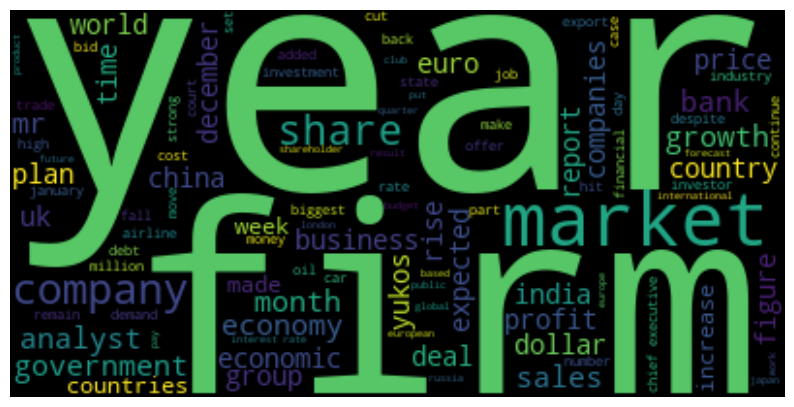

In [32]:
print("Word Cloud of Business Category")
display_cloud(b_data['clean'])

### 2. entertainment

In [33]:
e_data = train_df[train_df["Category"] == "entertainment"].copy()

e_data.shape

(273, 3)

In [34]:
e_data

,ArticleId,Text,Category
7,1797,french honour for director parker british film...,entertainment
9,1866,fockers fuel festive film chart comedy meet th...,entertainment
11,1153,housewives lift channel 4 ratings the debut of...,entertainment
16,342,u2 s desire to be number one u2 who have won ...,entertainment
21,177,carry on star patsy rowlands dies actress pats...,entertainment
...,...,...,...
1462,605,da vinci code is lousy history the plot of a...,entertainment
1476,783,bollywood draws global stars british actress a...,entertainment
1483,1904,beastie boys win sampling battle us rappers be...,entertainment
1485,857,double eviction from big brother model caprice...,entertainment


In [35]:
print("First 10 samples of entertainment relates news samples\n".format(), e_data[:10])

First 10 samples of entertainment relates news samples
     ArticleId                                               Text  \
7        1797  french honour for director parker british film...   
9        1866  fockers fuel festive film chart comedy meet th...   
11       1153  housewives lift channel 4 ratings the debut of...   
16        342  u2 s desire to be number one u2  who have won ...   
21        177  carry on star patsy rowlands dies actress pats...   
31       1407  rapper snoop dogg sued for  rape  us rapper sn...   
35        687  musical treatment for capra film the classic f...   
44       1522  obituary: dame alicia markova dame alicia mark...   
45        455  tv station refuses adoption show a tv station ...   
55       1418  blair buys copies of new band aid prime minist...   

         Category  
7   entertainment  
9   entertainment  
11  entertainment  
16  entertainment  
21  entertainment  
31  entertainment  
35  entertainment  
44  entertainment  
45  entertainme

**Data Containes:**

- Currancies
- Years/ Centuries (18th, 21st)
- Percentage
- distance (30ft, 10m)
- Numbers 

In [36]:
def remove_distances(text):
    """
    Removes distances from the text (e.g., 30ft, 10m, 5km, etc.).
    
    Args:
    text (str): Input string containing distances.
    
    Returns:
    str: Text with distances removed.
    """
    try:
        # Regex pattern to match distances (integers or decimals followed by distance units)
        distance_pattern = r'\d+(?:\.\d+)?\s*(ft|m|km|cm|mm|yd|mi)\b'
        
        # Replace all occurrences of the distance pattern with an empty string
        cleaned_text = re.sub(distance_pattern, '', text)
        
        return cleaned_text
    except Exception as e:
        raise e

In [37]:
def remove_centuries(text):
    """
    Removes centuries (e.g., 18th, 21st) from the text.
    
    Args:
    text (str): Input string containing centuries.
    
    Returns:
    str: Text with centuries removed.
    """
    try:
        # Regex pattern to match centuries (e.g., 18th, 21st, 5th, 20th)
        century_pattern = r'\d{1,2}(st|nd|rd|th)\b'
        
        # Replace all occurrences of centuries with an empty string
        cleaned_text = re.sub(century_pattern, '', text)
        
        return cleaned_text
    except Exception as e:
        raise e

In [38]:
# normalizing
e_data["clean"] = e_data["Text"].map(lambda x : x.lower())

# remove curruncies : businesss, entertainment
e_data["clean"] = e_data["clean"].map(lambda x : remove_curruncies(x))

# remove percentage : businesss
e_data["clean"] = e_data["clean"].map(lambda x : remove_percentage(x))

# remove distance : entertainment
e_data["clean"] = e_data["clean"].map(lambda x : remove_distances(x))

# remove conturies : entertainment
e_data["clean"] = e_data["clean"].map(lambda x : remove_centuries(x))

# remove numbers
e_data["clean"] = e_data["clean"].map(lambda x : remove_numbers(x))

# remove special characters
e_data["clean"] = e_data["clean"].map(lambda x : remove_special_characters(x))

# remove punctuations
e_data["clean"] = e_data["clean"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
e_data["clean"] = e_data["clean"].map(lambda x : remove_multiple_spaces(x))

# remove stopwords 
e_data["clean"] = e_data["clean"].map(lambda x : remove_stopwords(x))

# lemmetization
e_data["clean"] = e_data["clean"].map(lambda x : lemma_corpus(x, 'v'))

In [39]:
e_data.head()

,ArticleId,Text,Category,clean
7,1797,french honour for director parker british film...,entertainment,french honour director parker british film dir...
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,fockers fuel festive film chart comedy meet fo...
11,1153,housewives lift channel 4 ratings the debut of...,entertainment,housewives lift channel ratings debut us telev...
16,342,u2 s desire to be number one u2 who have won ...,entertainment,u desire number one u three prestigious grammy...
21,177,carry on star patsy rowlands dies actress pats...,entertainment,carry star patsy rowlands dies actress patsy r...


In [40]:
import random

for i in range(10):
    num = random.randint(0, e_data.shape[0])
    length = len(e_data.iloc[num][1])
    print(f"Text {num}: {e_data.iloc[num][1]}")
    print()
    print(f"Clean: {e_data.iloc[num][3]}")
    print('='*length)

Text 270: beastie boys win sampling battle us rappers beastie boys have won their long-running battle over the use of a sample in their song pass the mic.  the punk-rappers used three notes of music from flautist james newton s choir in their track from 1992. although the group had paid a licence fee for the sample  mr newton said his copyright had been infringed. but the us court of appeal upheld its original decision that the group did not have to pay an additional fee to license the underlying composition. the beastie boys - michael diamond  adam horowitz  and adam yauch - are considered to be one of early pioneers of sampling music.  sampling  now a standard practice among musicians  involves taking a segment of one track and using it in a different song. a three-judge panel of the court held in 2003 that the band had abided by copyright protections by paying a licence fee for a sample of mr newton s recording. that finding upheld a lower-court dismissal of the case in favour of th

Word Cloud of Entertainment Category


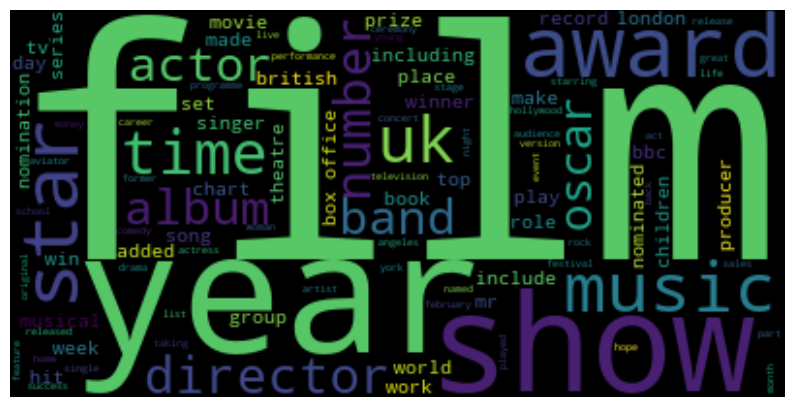

In [41]:
print("Word Cloud of Entertainment Category")
display_cloud(e_data['clean'])

### 3. politics

In [42]:
p_data = train_df[train_df["Category"] == "politics"].copy()

p_data.shape

(274, 3)

In [43]:
p_data

,ArticleId,Text,Category
5,1582,howard truanted to play snooker conservative...,politics
10,1683,blair rejects iraq advice calls tony blair has...,politics
28,1527,uk will stand firm on eu rebate britain s £3b...,politics
33,2100,security papers found in street an inquiry i...,politics
52,1763,mps quiz aides over royal income senior offici...,politics
...,...,...,...
1456,955,blair told to double overseas aid tony blair i...,politics
1463,2102,abbas will not tolerate attacks palestinian ...,politics
1472,1806,kelly trails new discipline power teachers cou...,politics
1475,980,budget to set scene for election gordon brown ...,politics


In [44]:
print("First 10 samples of politics relates news samples\n".format(), p_data[:10])

First 10 samples of politics relates news samples
     ArticleId                                               Text  Category
5        1582  howard  truanted to play snooker  conservative...  politics
10       1683  blair rejects iraq advice calls tony blair has...  politics
28       1527  uk will stand firm on eu rebate  britain s £3b...  politics
33       2100  security papers  found in street  an inquiry i...  politics
52       1763  mps quiz aides over royal income senior offici...  politics
58       1518  tory backing for id cards the tories are to ba...  politics
66       1079  stalemate in pension strike talks talks aimed ...  politics
67        947  tories outlining policing plans local communit...  politics
82        105  howard pitches for uk ethnic vote michael howa...  politics
83       1297  clarke to press on with id cards new home secr...  politics


**Data Containes:**

- Currancies
- Years
- Percentage
- Numbers 

In [45]:
# normalizing
p_data["clean"] = p_data["Text"].map(lambda x : x.lower())

# remove curruncies : businesss, entertainment
p_data["clean"] = p_data["clean"].map(lambda x : remove_curruncies(x))

# remove percentage : businesss
p_data["clean"] = p_data["clean"].map(lambda x : remove_percentage(x))

# remove distance : entertainment
p_data["clean"] = p_data["clean"].map(lambda x : remove_distances(x))

# remove conturies : entertainment
p_data["clean"] = p_data["clean"].map(lambda x : remove_centuries(x))

# remove numbers
p_data["clean"] = p_data["clean"].map(lambda x : remove_numbers(x))

# remove special characters
p_data["clean"] = p_data["clean"].map(lambda x : remove_special_characters(x))

# remove punctuations
p_data["clean"] = p_data["clean"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
p_data["clean"] = p_data["clean"].map(lambda x : remove_multiple_spaces(x))

# remove stopwords 
p_data["clean"] = p_data["clean"].map(lambda x : remove_stopwords(x))

# lemmetization
p_data["clean"] = p_data["clean"].map(lambda x : lemma_corpus(x, 'v'))

In [46]:
p_data.head()

,ArticleId,Text,Category,clean
5,1582,howard truanted to play snooker conservative...,politics,howard truanted play snooker conservative lead...
10,1683,blair rejects iraq advice calls tony blair has...,politics,blair rejects iraq advice calls tony blair rej...
28,1527,uk will stand firm on eu rebate britain s £3b...,politics,uk stand firm eu rebate britain eu rebate rene...
33,2100,security papers found in street an inquiry i...,politics,security papers found street inquiry way files...
52,1763,mps quiz aides over royal income senior offici...,politics,mps quiz aides royal income senior officials t...


In [47]:
import random

for i in range(10):
    num = random.randint(0, p_data.shape[0])
    length = len(p_data.iloc[num][1])
    print(f"Text {num}: {p_data.iloc[num][1]}")
    print()
    print(f"Clean: {p_data.iloc[num][3]}")
    print('='*length)

Text 210: howard attacks  pay later  budget tory leader michael howard has dismissed gordon brown s budget as  vote now  pay later  spending plans.  the simple fact was that under a new labour government taxes would go up after the election to plug a financial black hole  mr howard said. everyone could see the chancellor s  sweeteners   but these hid tax rises for hard working families  he said. labour s  faltering election campaign  would not be helped by the package of measures  mr howard added.  mr brown s budget was not about what was good for the country  but  all about the interests of the labour party   the tory leader said after mockingly welcoming the chancellor back to the election campaign. he went on to accuse mr brown of giving with one hand while taking away with the other. he urged the chancellor to admit he had been responsible for dragging  millions of people in to the net  to pay stamp duty and inheritance tax.  we can all see the sweeteners  but they hide the crippli

Word Cloud of Politics Category


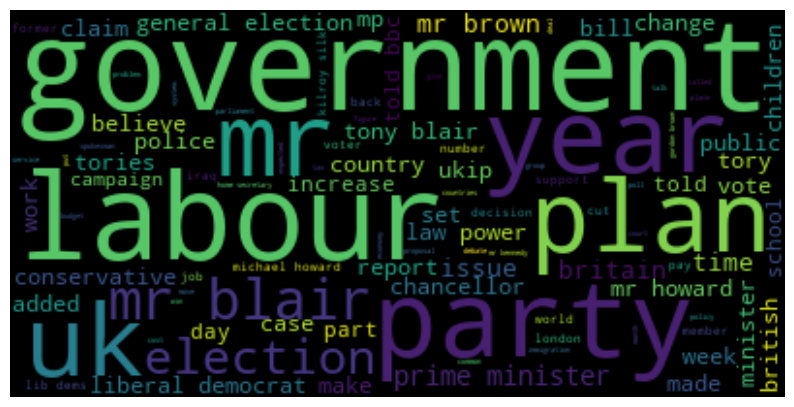

In [48]:
print("Word Cloud of Politics Category")
display_cloud(p_data['clean'])

### 4. sport

In [49]:
s_data = train_df[train_df["Category"] == "sport"].copy()

s_data.shape

(346, 3)

In [50]:
print("First 10 samples of sport relates news samples\n".format(), s_data[:10])

First 10 samples of sport relates news samples
     ArticleId                                               Text Category
6         651  wales silent on grand slam talk rhys williams ...    sport
14        707  ireland 21-19 argentina an injury-time dropped...    sport
15       1588  wenger signs new deal arsenal manager arsene w...    sport
17        486  hantuchova in dubai last eight daniela hantuch...    sport
18       1344  melzer shocks agassi in san jose second seed a...    sport
20       1547  hewitt overcomes wobble in sydney lleyton hewi...    sport
22       1785  serena becomes world number two serena william...    sport
23       1617  ferguson urges henry punishment sir alex fergu...    sport
27       1026  henman to face saulnier test british number on...    sport
34        466  philippoussis doubt over open bid mark philipp...    sport


**Data Containes:**

- Currancies
- Years
- Percentage
- Numbers 

In [51]:
# normalizing
s_data["clean"] = s_data["Text"].map(lambda x : x.lower())

# remove curruncies : businesss, entertainment
s_data["clean"] = s_data["clean"].map(lambda x : remove_curruncies(x))

# remove percentage : businesss
s_data["clean"] = s_data["clean"].map(lambda x : remove_percentage(x))

# remove distance : entertainment
s_data["clean"] = s_data["clean"].map(lambda x : remove_distances(x))

# remove conturies : entertainment
s_data["clean"] = s_data["clean"].map(lambda x : remove_centuries(x))

# remove numbers
s_data["clean"] = s_data["clean"].map(lambda x : remove_numbers(x))

# remove special characters
s_data["clean"] = s_data["clean"].map(lambda x : remove_special_characters(x))

# remove punctuations
s_data["clean"] = s_data["clean"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
s_data["clean"] = s_data["clean"].map(lambda x : remove_multiple_spaces(x))

# remove stopwords 
s_data["clean"] = s_data["clean"].map(lambda x : remove_stopwords(x))

# lemmetization
s_data["clean"] = s_data["clean"].map(lambda x : lemma_corpus(x, 'v'))

In [52]:
s_data.head()

,ArticleId,Text,Category,clean
6,651,wales silent on grand slam talk rhys williams ...,sport,wales silent grand slam talk rhys williams say...
14,707,ireland 21-19 argentina an injury-time dropped...,sport,ireland argentina injury time dropped goal ron...
15,1588,wenger signs new deal arsenal manager arsene w...,sport,wenger signs new deal arsenal manager arsene w...
17,486,hantuchova in dubai last eight daniela hantuch...,sport,hantuchova dubai last eight daniela hantuchova...
18,1344,melzer shocks agassi in san jose second seed a...,sport,melzer shocks agassi san jose second seed andr...


In [53]:
import random

for i in range(10):
    num = random.randint(0, s_data.shape[0])
    length = len(s_data.iloc[num][1])
    print(f"Text {num}: {s_data.iloc[num][1]}")
    print()
    print(f"Clean: {s_data.iloc[num][3]}")
    print('='*length)

Text 49: houllier praises benitez regime former liverpool manager gerard houllier has praised the work of his anfield successor rafael benitez.  houllier was angry at reports that he has been critical of benitez since the spaniard took over at liverpool. but houllier told bbc sport:  in private and in public  i have stressed i believe rafa is doing a good job. he is the right man at the right place.  rafa is a good coach and a good man. i ve spoken to him since he has been at liverpool and never criticised him.  houllier also revealed he is now ready to return to the game after leaving liverpool in may following six years at anfield.  the former france boss has been linked with a host of jobs and pulled out of the race to succeed mark hughes as wales national coach. he has been working for uefa  covering the premiership for french television and also coaching in brazil with national coach carlos alberto perreira. houllier said:  if a good club comes up at the right time then yes  i am 

Word Cloud of Sport Category


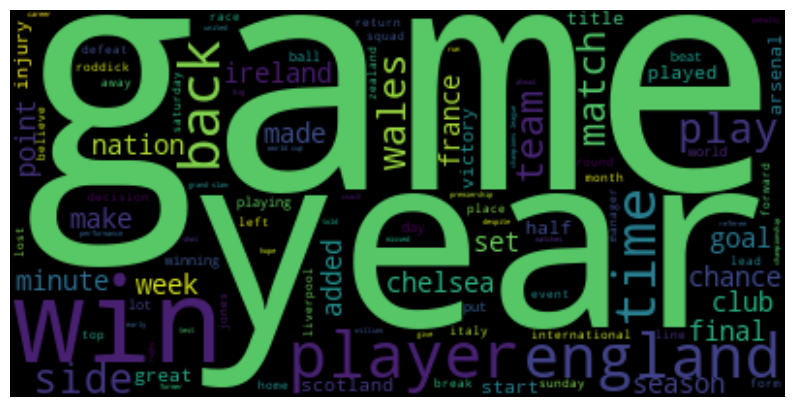

In [54]:
print("Word Cloud of Sport Category")
display_cloud(s_data['clean'])

### 5. tech

In [55]:
t_data = train_df[train_df["Category"] == "tech"].copy()

t_data.shape

(261, 3)

In [56]:
print("First 10 samples of tech relates news samples\n".format(), t_data[:10])

First 10 samples of tech relates news samples
     ArticleId                                               Text Category
3        1976  lifestyle  governs mobile choice  faster  bett...     tech
19       1552  moving mobile improves golf swing a mobile pho...     tech
24        405  bt boosts its broadband packages british telec...     tech
26        702  peer-to-peer nets  here to stay  peer-to-peer ...     tech
30       1951  pompeii gets digital make-over the old-fashion...     tech
39       1532  security scares spark browser fix microsoft is...     tech
40       2205  argonaut founder rebuilds empire jez san  the ...     tech
43       1394  viewers to be able to shape tv imagine editing...     tech
46        593  china  ripe  for media explosion asia is set t...     tech
47        590  broadband fuels online change fast web access ...     tech


**Data Containes:**

- Currancies
- Years
- Percentage
- Numbers 

In [57]:
# normalizing
t_data["clean"] = t_data["Text"].map(lambda x : x.lower())

# remove curruncies : businesss, entertainment
t_data["clean"] = t_data["clean"].map(lambda x : remove_curruncies(x))

# remove percentage : businesss
t_data["clean"] = t_data["clean"].map(lambda x : remove_percentage(x))

# remove distance : entertainment
t_data["clean"] = t_data["clean"].map(lambda x : remove_distances(x))

# remove conturies : entertainment
t_data["clean"] = t_data["clean"].map(lambda x : remove_centuries(x))

# remove numbers
t_data["clean"] = t_data["clean"].map(lambda x : remove_numbers(x))

# remove special characters
t_data["clean"] = t_data["clean"].map(lambda x : remove_special_characters(x))

# remove punctuations
t_data["clean"] = t_data["clean"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
t_data["clean"] = t_data["clean"].map(lambda x : remove_multiple_spaces(x))

# remove stopwords 
t_data["clean"] = t_data["clean"].map(lambda x : remove_stopwords(x))

# lemmetization
t_data["clean"] = t_data["clean"].map(lambda x : lemma_corpus(x, 'v'))

In [58]:
t_data.head()

,ArticleId,Text,Category,clean
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...
19,1552,moving mobile improves golf swing a mobile pho...,tech,moving mobile improves golf swing mobile phone...
24,405,bt boosts its broadband packages british telec...,tech,bt boosts broadband packages british telecom s...
26,702,peer-to-peer nets here to stay peer-to-peer ...,tech,peer peer nets stay peer peer pp networks stay...
30,1951,pompeii gets digital make-over the old-fashion...,tech,pompeii gets digital make old fashioned audio ...


In [59]:
import random

for i in range(10):
    num = random.randint(0, t_data.shape[0])
    length = len(t_data.iloc[num][1])
    print(f"Text {num}: {t_data.iloc[num][1]}")
    print()
    print(f"Clean: {t_data.iloc[num][3]}")
    print('='*length)

Text 7: viewers to be able to shape tv imagine editing titanic down to watch just your favourite bits or cutting out the slushier moments of star wars to leave you with a bare bones action-fest.  manipulating your favourite films to make a more personalised movie is just the beginning of an ambitious new 7.5m euro (£5.1m) project funded by the european union. new media for a new millennium (nm2) will have as its endgame the development of a completely new media genre  which will allow audiences to create their own media worlds based on their specific interests or tastes. viewers will be able to participate in storylines  manipulate plots and even the sets and props of tv shows. bt is one of 13 partners involved in the project. it will be contributing software that was originally designed to spot anomalies in cctv pictures. the software uses content recognition algorithms. the three-year project will work on seven productions as it develops a set of software tools that will allow viewer

Word Cloud of Tech Category


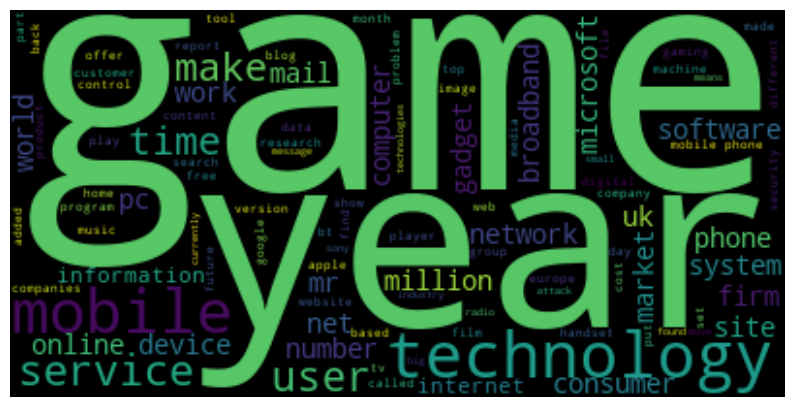

In [60]:
print("Word Cloud of Tech Category")
display_cloud(t_data['clean'])

## Full Text Cleaning

In [61]:
train_df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [62]:
# normalizing
train_df["clean_text"] = train_df["Text"].map(lambda x : x.lower())

# remove curruncies : businesss, entertainment
train_df["clean_text"] = train_df["clean_text"].map(lambda x : remove_curruncies(x))

# remove percentage : businesss
train_df["clean_text"] = train_df["clean_text"].map(lambda x : remove_percentage(x))

# remove distance : entertainment
train_df["clean_text"] = train_df["clean_text"].map(lambda x : remove_distances(x))

# remove conturies : entertainment
train_df["clean_text"] = train_df["clean_text"].map(lambda x : remove_centuries(x))

# remove numbers
train_df["clean_text"] = train_df["clean_text"].map(lambda x : remove_numbers(x))

# remove special characters
train_df["clean_text"] = train_df["clean_text"].map(lambda x : remove_special_characters(x))

# remove punctuations
train_df["clean_text"] = train_df["clean_text"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
train_df["clean_text"] = train_df["clean_text"].map(lambda x : remove_multiple_spaces(x))

# remove stopwords 
train_df["clean_text"] = train_df["clean_text"].map(lambda x : remove_stopwords(x))

# lemmetization
train_df["clean_text"] = train_df["clean_text"].map(lambda x : lemma_corpus(x, 'v'))

In [63]:
train_df.head()

,ArticleId,Text,Category,clean_text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex boss launches defence lawyers defe...
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses payout eighteen former enron dire...


In [64]:
import random

for i in range(10):
    num = random.randint(0, train_df.shape[0])
    length = len(train_df.iloc[num][1])
    print(f"Text {num}: {train_df.iloc[num][1]}")
    print()
    print(f"Clean: {train_df.iloc[num][3]}")
    print('='*length)

Text 701: willis sues over movie  injury  actor bruce willis is suing revolution studios over an injury he said he suffered while making tears of the sun.  willis is seeking medical expenses after he said he was hit in the head by a firework during the filming of the 2002 movie  produced by the firm. the lawsuit said the star has endured mental and physical injuries as a result of the alleged incident.  we are not able to comment on pending litigation   revolution studios spokesman sean dudas said.  in tears of the sun willis plays a us military commander who disobeys orders to try and help save a doctor and patients trapped in the nigerian jungle. directed by antoine fuqua  the film was poorly received by critics and did not perform strongly at the box office. according to the lawsuit  the injury was suffered during the firing of explosions as part of a special effect. the explosions  known as squibs  were intended to  simulate the appearance of bullets striking the ground . the lawsu

In [65]:
train_df.head()

,ArticleId,Text,Category,clean_text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex boss launches defence lawyers defe...
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses payout eighteen former enron dire...


Word Cloud of All Category


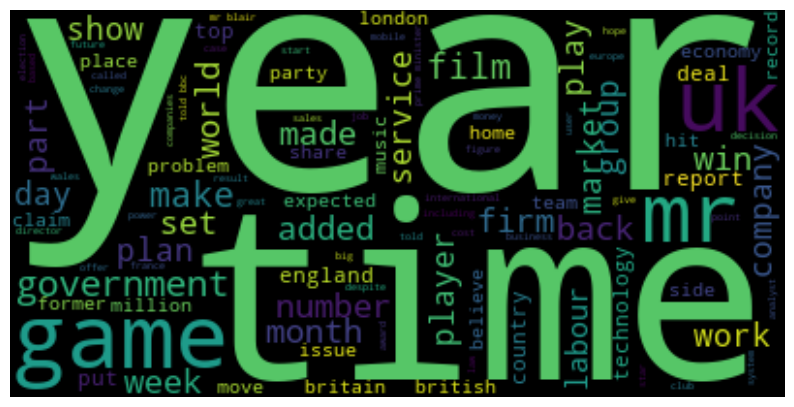

In [66]:
print("Word Cloud of All Category")
display_cloud(train_df['clean_text'])

## Label Encoding

In [67]:
train_df.head()

,ArticleId,Text,Category,clean_text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex boss launches defence lawyers defe...
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses payout eighteen former enron dire...


In [68]:
category_label = {}
for index, category in enumerate(train_df["Category"].unique()):
    print(index, ':', category)
    category_label.update({category : index})

train_df["Label"] = train_df["Category"].map(lambda x : category_label[x])

0 : business
1 : tech
2 : politics
3 : sport
4 : entertainment


In [69]:
train_df.head()

,ArticleId,Text,Category,clean_text,Label
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex boss launches defence lawyers defe...,0
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens maj...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...,1
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses payout eighteen former enron dire...,0


## Cleaning Test Data

In [70]:
# normalizing
test_df["clean_text"] = test_df["Text"].map(lambda x : x.lower())

# remove curruncies : businesss, entertainment
test_df["clean_text"] = test_df["clean_text"].map(lambda x : remove_curruncies(x))

# remove percentage : businesss
test_df["clean_text"] = test_df["clean_text"].map(lambda x : remove_percentage(x))

# remove distance : entertainment
test_df["clean_text"] = test_df["clean_text"].map(lambda x : remove_distances(x))

# remove conturies : entertainment
test_df["clean_text"] = test_df["clean_text"].map(lambda x : remove_centuries(x))

# remove numbers
test_df["clean_text"] = test_df["clean_text"].map(lambda x : remove_numbers(x))

# remove special characters
test_df["clean_text"] = test_df["clean_text"].map(lambda x : remove_special_characters(x))

# remove punctuations
test_df["clean_text"] = test_df["clean_text"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
test_df["clean_text"] = test_df["clean_text"].map(lambda x : remove_multiple_spaces(x))

# remove stopwords
test_df["clean_text"] = test_df["clean_text"].map(lambda x : remove_stopwords(x))

# lemmatize
test_df["clean_text"] = test_df["clean_text"].map(lambda x : lemma_corpus(x, 'v'))

In [71]:
test_df.head()

,ArticleId,Text,clean_text
0,1018,qpr keeper day heads for preston queens park r...,qpr keeper day heads preston queens park range...
1,1319,software watching while you work software that...,software watching work software monitor every ...
2,1138,d arcy injury adds to ireland woe gordon d arc...,arcy injury adds ireland woe gordon arcy ruled...
3,459,india s reliance family feud heats up the ongo...,india reliance family feud heats ongoing publi...
4,1020,boro suffer morrison injury blow middlesbrough...,boro suffer morrison injury blow middlesbrough...


In [72]:
train_df.to_csv("data/train_clean_data.csv",index=False)
test_df.to_csv("data/test_clean_data.csv",index=False)